In [43]:
# import cv2
# import keras
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input, decode_predictions
# import numpy as np
# from modules import *
# from utils import *

# ########## have to import a EEG snippet from somewhere
# #img_path = '/Users/fchollet/Downloads/creative_commons_elephant.jpg'
# df = pd.read_csv("E:/SleepWell/ASSC/data/lastpurifiedallDataChannel1.csv")
# EEG_sample = df.iloc[1002].values
# stage = EEG_sample[-2]
# EEG_sample = EEG_sample[:-2]

# EEG_sample = EEG_sample+ np.mean(EEG_sample)
# EEG_sample = EEG_sample/np.std(EEG_sample)

# EEG_sample = np.expand_dims(EEG_sample,axis=-1)
# EEG_sample = np.expand_dims(EEG_sample, axis=0)



# from keras.models import model_from_json

# # Model reconstruction from JSON file
# with open('E:/SleepWell/ASSC/models/EEGcasetteonlyADGC_2019-01-21 14-52-02.119827/model.json', 'r') as f:
#     model = model_from_json(f.read(), {'Scale': Scale})
# # Load weights into the new model
# model.load_weights(r'E:/SleepWell/ASSC/models/EEGcasetteonlyADGC_2019-01-21 14-52-02.119827/weights.0022-0.8989.hdf5')
# val= int(stage)-1


############# GradCAM stffffff ###########################

output = model.output[:,-4]
last_conv_layer = model.get_layer('conv1d_20') ##### have to change the name here


grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1)) ### no idea what to do here
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([EEG_sample])
for i in range(192):
    print("Iteration %d" % i)
    conv_layer_output_value[ :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)



# plt.matshow(heatmap)


# img = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = heatmap * 0.4 + img
# #cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [44]:
heatmap

array([0.15818815, 0.10085495, 0.05081436, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23709735, 0.4033915 , 0.48090693,
       0.48250774, 0.4582356 , 0.42001155, 0.36476743, 0.27483684,
       0.17139827, 0.08831019, 0.01875053, 0.        , 0.        ,
       0.04829805, 0.13975117, 0.23601963, 0.29261652, 0.32396796,
       0.33286607, 0.32722327, 0.3064916 , 0.26827246, 0.24308845,
       0.22153318, 0.22493759, 0.2310513 , 0.24064928, 0.2541086 ,
       0.27128744, 0.32023048, 0.39409685, 0.47658232, 0.567639  ,
       0.65440917, 0.72818136, 0.7958434 , 0.85003895, 0.86376

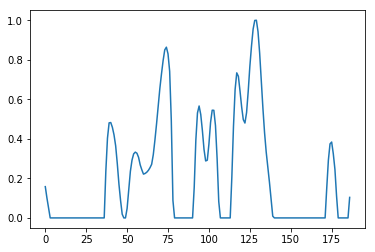

In [45]:
import matplotlib.pyplot as plt
plt.plot(heatmap)
plt.show()

Stage 1004


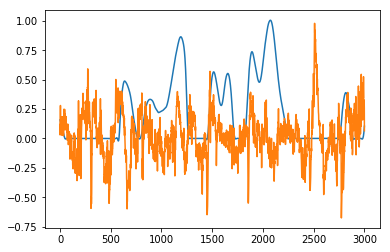

In [46]:
from scipy.interpolate import interp1d

c= 0



x = np.linspace(0, 3000, num=187)
y = heatmap
f1 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 3000, num=3000)
ynew = f1(xnew)
print("Stage %d" % stage)
plt.plot(xnew, ynew)

plt.plot(EEG_sample[0,:,0]/5*np.std(EEG_sample[0,:,0]))

plt.show()

In [157]:
np.var

<module 'numpy' from 'C:\\Users\\User\\Anaconda3\\envs\\thesis\\lib\\site-packages\\numpy\\__init__.py'>

In [149]:
f1 = np.array(f1)
f1

array(<scipy.interpolate.interpolate.interp1d object at 0x000001563AAEB868>,
      dtype=object)

In [100]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3000, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 3000, 64)     1088        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3000, 64)     256         conv1d_1[0][0]                   
__________________________________________________________________________________________________
scale_1 (Scale)                 (None, 3000, 64)     128         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation

In [1]:
def compute_weight(Y, classes):
    num_samples = len(Y)
    n_classes = len(classes)
    num_bin = np.bincount(Y[:, 0])
    class_weights = {i: (num_samples / (n_classes * num_bin[i])) for i in range(6)}
    return class_weights


In [20]:
import pandas as pd
#df2 = pd.read_csv('E:/SleepWell/ASSC-master/data/purifiedallDataChannel2.csv', header=None)
#df2.rename({3000: 'hyp', 3001: 'epoch', 3002: 'patID'}, axis="columns", inplace=True)
from keras.utils import to_categorical, plot_model
trainX, valX, trainY, valY, pat_train, pat_val = patientSplitter('randomizedIDs.csv', df2, 0.7)
print("Dataframe has been loaded")




    #####এই স্প্লিটিং করা যাবে না। লিখতে হবে। পেশেন্ট আইডি এর উপর বেইজ করে স্প্লিট করতে হবে।

    ######পেশেন্ট আইডী বেজ করে স্প্লিট করা নিয়ে কাজ করতে হবে এইখানে। ১৫ জনের ডাটা যাবে ট্রেনিং এ, বাকি দের ডেটা যাবে ভ্যালিডেশনে। ##############

dummytrainY = trainY.astype(int)-1
dummytrainY= dummytrainY
#print(Counter(trainY))
trainY = to_categorical(trainY-1, 7)
valY = to_categorical(valY-1, 7)
trainX = np.expand_dims(trainX,axis=-1)
valX = np.expand_dims(valX, axis=-1)


[14, 30, 11, 15, 29, 8, 48, 24, 40, 54, 16, 37, 10, 39, 7, 18, 42, 57, 31]
35
21
22
43
9
56
34
58
26
6
3
55
33
2
27
13
46
45
38
47
17
5
25
32
1
52
50
12
41
51
4
19
0
23
53
49
36
20
44
60
59
28
14
30
11
15
29
8
48
24
40
54
16
37
10
39
7
18
42
57
31
Dataframe has been loaded


NameError: name 'params' is not defined

In [4]:
def patientSplitter(randomIDfile,df2,split_portion):
    import pandas as pd

    df1 = pd.read_csv(randomIDfile,header=None)
    split_portion_numer=int(split_portion*61)

    train_pat_list = [int(each) for each in df1.iloc[:split_portion_numer].values]
    test_pat_list = [int(each) for each in df1.iloc[split_portion_numer:].values]
    print(test_pat_list)
    df3 = []
    df4 = []
    for pat_ID in train_pat_list:
        df3.append(df2[df2.patID == pat_ID].values)
        print(pat_ID)
    for pat_ID in test_pat_list:
        df4.append(df2[df2.patID == pat_ID].values)
        print(pat_ID)
    del df2
    df3 = pd.np.vstack(df3)
    df4 = pd.np.vstack(df4)
    X_train = df3[:, :3000]
    X_test= df4[:, :3000]
    Y_train= df3[:,3000]
    Y_test= df4[:,3000]
    pat_train=df3[:, 3002:3003]
    pat_test= df4[:, 3002:3003]

    del pd
    return X_train,X_test,Y_train,Y_test,pat_train,pat_test


In [16]:
import numpy as np
compute_weight(dummytrainY, np.unique(dummytrainY))

IndexError: too many indices for array

In [12]:
(trainY).shape

(82843,)

In [19]:
np.unique(dummytrainY)

array([1, 2, 3, 4, 5, 6])

In [61]:
a= {'classweights': "kjhaskdfj", 'kjhk': "jhksadfjhaksjdfhak"}
# a.pop('classweights')
print(a)
params = a

{'classweights': 'kjhaskdfj', 'kjhk': 'jhksadfjhaksjdfhak'}


In [72]:
df1 = pd.read_csv("E:/SleepWell/ASSC/logs/allDataChannel1_2019-01-07 12-23-06.911431/training.csv", index_col=False)
df1 = df1.sort_values('val_acc')
a = df1.head(1)
# print(a)
# b = a.to_dict()
# print(b)
a = a.join(pd.DataFrame(params,index=[0]))

,epoch,acc,loss,lr,val_acc,val_loss,classweights,kjhk
0,0,0.791014,0.576767,0.000691,0.734471,0.888149,kjhaskdfj,jhksadfjhaksjdfhak


In [24]:
print(b)

{'val_acc': {0: 0.7344706100500649}, 'lr': {0: 0.0006910841329954566}, 'epoch': {0: 0}, 'loss': {0: 0.5767672482317713}, 'val_loss': {0: 0.8881486440707747}, 'acc': {0: 0.7910143283099214}}


In [26]:
print(a)

   epoch       acc      loss        lr   val_acc  val_loss
0      0  0.791014  0.576767  0.000691  0.734471  0.888149


In [34]:
a[0:]

,epoch,acc,loss,lr,val_acc,val_loss
0,0,0.791014,0.576767,0.000691,0.734471,0.888149


In [43]:
a=a.reset_index(drop=True, inplace=True)

In [45]:
print(a)

None


In [90]:
df = pd.read_csv("E:/sleepEDFx/pat2cha3.csv")

In [91]:
a=df.head(1)

,34.984,39.325,52.347,52.829,48.488,31.126,26.785,21.48,23.409,11.352,...,-34.949.11,-34.949.12,-16.139.13,-44.112.11,-34.949.13,-50.382.4,-53.758.7,-119.83.2,9,1
